In [1]:
h_step =10 # step in meters
hMin   = -7E3
hMax   = 30E3 # maximum height above sea level to calculate

## Barometric approximation
# values from http://en.wikipedia.org/wiki/Atmospheric_pressure
P0 = 101.325E3 # pressure at sealevel
M  = 0.0289644 # molar mass of dry air in kg/mol
g  = 9.81      # ms^-2
R  = 8.31447   # universal gas constant J/(molK)
T  = 288.15    # temperature in kelvin (assume constant)

## Antoine equation for pressure (from http://en.wikipedia.org/wiki/Antoine_equation)
#  The constants are given in °C and mmHg.
A = 8.07131 
B = 1730.63 
C = 233.426

## useful heights
heightdict= {'Eiffel Tower': 95, ' Burj Khalifa': 828, 'Mount Everest': 8848,
             'Planes': 11.9E3}

## convert pressure in Pa to mmhg
def pascal2mmhg(p_pa):  
    p_mmhg= p_pa *0.00750061683
    return p_mmhg 

In [2]:
from numpy import *
heights=arange(hMin,hMax,h_step)

## calculate pressure dependence on height using Barometric equation
pressure = P0 * exp(-(M*g*heights)/(R*T))

## use pressure in the Antoine equation 
TempBoiling = B/(A-log10(pascal2mmhg(pressure))) - C

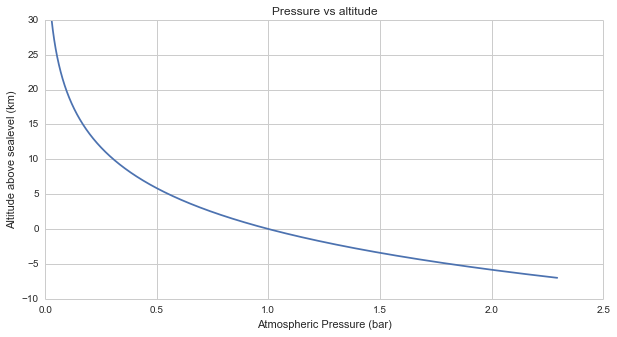

In [6]:
import matplotlib.pyplot as p
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")

## make pressure vs height
p.figure(figsize=(10,5), dpi=100)
p.plot(pressure/P0,heights/1000)
p.xlabel('Atmospheric Pressure (bar)')
p.ylabel('Altitude above sealevel (km)')
p.title('Pressure vs altitude')
p.show()


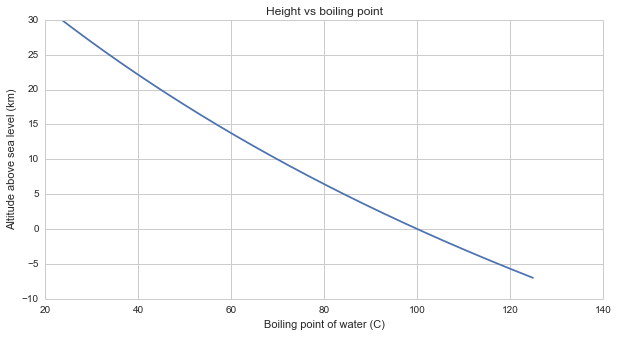

In [11]:
p.figure(figsize=(10,5), dpi=100)
p.plot(TempBoiling,heights/1000)
p.xlabel('Boiling point of water (C)')
p.ylabel('Altitude above sea level (km)')
p.title('Height vs boiling point')
p.show()